In [10]:
import numpy as np
import json
import collections
import matplotlib.pyplot as plt

In [11]:
np.random.seed(42) ## random seed fixed

d = 100 # dimensions of data
n = 1000 # number of data points
X = np.random.normal(0,1, size=(n,d))
X_test = np.random.normal(0,1,size=(n,d))
w_true = np.random.normal(0,1, size=(d,1))
y = X.dot(w_true) + np.random.normal(0,0.5,size=(n,1))
y_test = X_test.dot(w_true) + np.random.normal(0,0.5,size=(n,1))

In [12]:
def square_loss(w,X,y):
	"""
	Implement total squared error given weight w, dataset (X,y)
	Inputs:
	- w: weight for the linear function
	- X: dataset of size (n,d)
	- y: label of size (n,1)
	Returns:
	- loss: total squared error of w on dataset (X,y)
	"""
	return np.sum(np.square(X.dot(w) - y))

In [13]:
#### Implement closed-form solution given dataset (X,y)
def closed_form(X,y):
  """
  Implement closed-form solution given dataset (X,y)
  Inputs:
  - X: dataset of size (n,d)
  - y: label of size (n,1)
  Returns:
  - w_LS: closed form solution of the weight
  - loss: total squared error of w_LS on dataset (X,y)
  """
  w_LS = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
  loss = square_loss(w_LS, X, y)
  return w_LS, loss

In [24]:
def gradient_descent(X, y, lr_set, N_iteration):
  """
  Implement gradient descent on the square-error given dataset (X, y) for each learning rate in lr_set.
  Inputs:
  - X: dataset of size (n, d)
  - y: label of size (n, 1)
  - lr_set: a list of learning rates
  - N_iteration: the number of iterations
  Returns:
  - a plot with k curves where k is the length of lr_set
  - each curve contains 20 data points, in which the i-th data point represents the total squared-error
    with respect to the i-th iteration
  - You can print the final objective value within this function to show the performance of the best step size
  """
  min_losses = []
  for lr in lr_set:
    w = np.zeros((d,1))
    loss_history = []
    for iter in range(N_iteration):
      tse = square_loss(w, X, y)
      gradient = X.T.dot(X).dot(w) - X.T.dot(y)
      w = w - lr * gradient
      loss_history.append((iter, tse))
    iterations, losses = zip(*loss_history)
    min_losses.append(losses[-1])
    plt.plot(iterations, losses, label=f'LR={lr}')

  plt.xlabel('Iteration')
  plt.ylabel('Total Squared Error')
  plt.title('Gradient Descent Optimization')
  plt.legend()
  plt.show()

  min_losses = np.array(min_losses)
  print(f'final objective value: {np.min(min_losses)}')
  print(f'best step size: {lr_set[np.argmin(min_losses)]}')

In [25]:
def stochastic_gradient_descent(X,y,lr_set,N_iteration):
  """
  Implement gradient descent on the square-error given dataset (X,y) and for each learning rate in lr_set
  Inputs:
  - X: dataset of size (n,d)
  - y: label of size (n,1)
  - lr_set: a list of learning rate.
  - N_itertion: the number of iterations
  Returns:
  - a plot with k curves where k is the length of lr_set.
  - each curve contains 1000 data points, in which the i-th data point represents the total squared-error with respect to the i-th iteration
  - You can print the final objective value within this function to show the performance of best step size
  """
  np.random.seed(1) # Use this fixed random_seed in sampling
  min_losses = []
  for lr in lr_set:
    w = np.zeros((d,1))
    loss_history = []
    for iter in range(N_iteration):
      i = np.random.randint(n)
      tse = square_loss(w, X, y)
      gradient = (np.dot(X[i], w) - y[i]) * X[i].reshape(-1, 1)
      w = w - lr * gradient
      loss_history.append((iter, tse))
    iterations, losses = zip(*loss_history)
    min_losses.append(losses[-1])
    plt.plot(iterations, losses, label=f'LR={lr}')

  plt.xlabel('Iteration')
  plt.ylabel('Total Squared Error')
  plt.title('Stochastic Gradient Descent Optimization')
  plt.legend()
  plt.show()

  min_losses = np.array(min_losses)
  print(f'final objective value: {np.min(min_losses)}')
  print(f'best step size: {lr_set[np.argmin(min_losses)]}')

F(w_LS)= 217.48452613173995  on training data
F(w_0)= 78885.82819617869  on training data
F(w_LS)= 294.0683698939913  on testing data


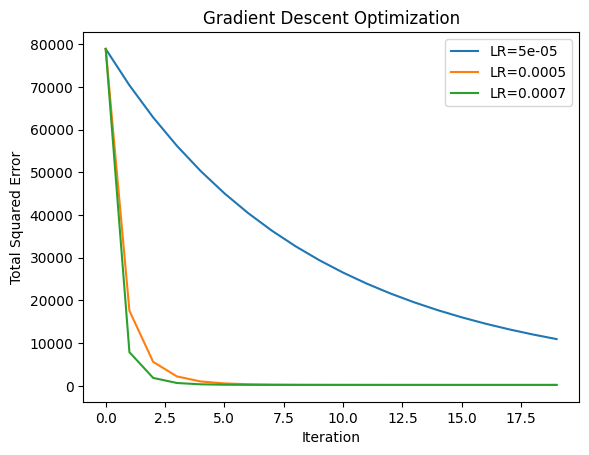

final objective value: 217.48462429057832
best step size: 0.0007


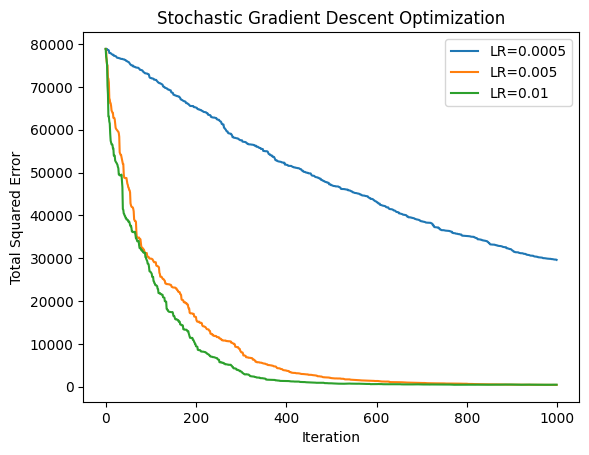

final objective value: 393.3714309232492
best step size: 0.005


In [28]:
def main():
  ### Problem 4.1 ###
  w_LS, loss_LS_train = closed_form(X,y)
  w_0 = np.zeros((d,1))
  loss_0_train = square_loss(w_0,X,y)
  loss_LS_test = square_loss(w_LS,X_test, y_test)

  print("F(w_LS)=", loss_LS_train, " on training data")
  print("F(w_0)=", loss_0_train, " on training data")
  print("F(w_LS)=", loss_LS_test, " on testing data")
  # gap: 76.58384376225135


  ### Problem 4.2 (Gradient Descent) ###
  ### You can plot more options of lr_set if necessary
  lr_set = [0.00005, 0.0005, 0.0007]
  N_iter = 20
  gradient_descent(X,y,lr_set,N_iter)
  # a high lr may overshoot the minimum, causing divergence
  # a low hr may cause slow convergence and risk getting stuck in local minimum
  # a optimal lr achieves a balance, ensuring efficient and stable convergence
  # best step size is 0.0007 and objective function value is 217.48462429057832

  ### Problem 4.3 (Stochastic Gradient Descent) ###
  ### You can plot more options of lr_set if necessary
  lr_set = [0.0005, 0.005, 0.01]
  N_iter = 1000
  stochastic_gradient_descent(X,y,lr_set,N_iter)
  # effect of lr on convergence is generally similar to that of gradient descent
  # effect of same lr on convergence is not as strong as gradient descent
  # gd use each data point N_iter times, sgd use each data point [0, N_iter] times
  # best step size is 0.005 and objective function value is 393.3714309232492


if __name__ == "__main__":
	main()